In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import matplotlib as mpl
import sys
import os
import gseapy as gp
import pdb
import copy
from scipy import sparse
import anndata
import cerberus
import ternary
import pyranges as pr


p = os.path.dirname(os.path.dirname(os.getcwd()))
sys.path.append(p)

from scripts.utils import *
from scripts.plotting import *

## Remove columns

In [2]:
ca = cerberus.read('../gtex/gtex_cerberus.h5')

In [3]:
drop_cols = ['tss_first_sd_issue', 'tes_last_sa_issue']
ca.t_map.drop(drop_cols, axis=1, inplace=True)

In [4]:
ca.write('cerberus_encode.h5')

In [5]:
ca.t_map.head()

,original_transcript_id,ic,ic_id,tss_id,tss,tes_id,tes,gene_id,gene_name,original_transcript_name,transcript_triplet,transcript_id,transcript_name,source
0,ENST00000003912.7,2,ENSG00000001461_2,ENSG00000001461_1,1,ENSG00000001461_1,1.0,ENSG00000001461,NIPAL3,NIPAL3-201,"[1,2,1]","ENSG00000001461[1,2,1]","NIPAL3[1,2,1]",v40
1,ENST00000008440.9,3,ENSG00000010072_3,ENSG00000010072_1,1,ENSG00000010072_2,2.0,ENSG00000010072,SPRTN,SPRTN-201,"[1,3,2]","ENSG00000010072[1,3,2]","SPRTN[1,3,2]",v40
2,ENST00000009105.5,2,ENSG00000008118_2,ENSG00000008118_1,1,ENSG00000008118_1,1.0,ENSG00000008118,CAMK1G,CAMK1G-201,"[1,2,1]","ENSG00000008118[1,2,1]","CAMK1G[1,2,1]",v40
3,ENST00000010299.10,2,ENSG00000009780_2,ENSG00000009780_1,1,ENSG00000009780_3,3.0,ENSG00000009780,FAM76A,FAM76A-201,"[1,2,3]","ENSG00000009780[1,2,3]","FAM76A[1,2,3]",v40
4,ENST00000011700.10,6,ENSG00000048707_6,ENSG00000048707_5,5,ENSG00000048707_13,13.0,ENSG00000048707,VPS13D,VPS13D-201,"[5,6,13]","ENSG00000048707[5,6,13]","VPS13D[5,6,13]",v40


In [6]:
ca = cerberus.read('cerberus_encode.h5')
ca.t_map.head()

,original_transcript_id,ic,ic_id,tss_id,tss,tes_id,tes,gene_id,gene_name,original_transcript_name,transcript_triplet,transcript_id,transcript_name,source
0,ENST00000003912.7,2,ENSG00000001461_2,ENSG00000001461_1,1,ENSG00000001461_1,1.0,ENSG00000001461,NIPAL3,NIPAL3-201,"[1,2,1]","ENSG00000001461[1,2,1]","NIPAL3[1,2,1]",v40
1,ENST00000008440.9,3,ENSG00000010072_3,ENSG00000010072_1,1,ENSG00000010072_2,2.0,ENSG00000010072,SPRTN,SPRTN-201,"[1,3,2]","ENSG00000010072[1,3,2]","SPRTN[1,3,2]",v40
2,ENST00000009105.5,2,ENSG00000008118_2,ENSG00000008118_1,1,ENSG00000008118_1,1.0,ENSG00000008118,CAMK1G,CAMK1G-201,"[1,2,1]","ENSG00000008118[1,2,1]","CAMK1G[1,2,1]",v40
3,ENST00000010299.10,2,ENSG00000009780_2,ENSG00000009780_1,1,ENSG00000009780_3,3.0,ENSG00000009780,FAM76A,FAM76A-201,"[1,2,3]","ENSG00000009780[1,2,3]","FAM76A[1,2,3]",v40
4,ENST00000011700.10,6,ENSG00000048707_6,ENSG00000048707_5,5,ENSG00000048707_13,13.0,ENSG00000048707,VPS13D,VPS13D-201,"[5,6,13]","ENSG00000048707[5,6,13]","VPS13D[5,6,13]",v40


## How many detected transcripts / genes do we assign to single-bp regions?

In [39]:
h5 = 'cerberus_annot.h5'
filt_ab = 'cerberus_filtered_abundance.tsv'

In [38]:
ca = cerberus.read(h5)

In [42]:
df = pd.read_csv(filt_ab, sep='\t')
df, ids = get_tpm_table(df,
               how='iso',
               min_tpm=1,
               gene_subset='polya')

df = pd.DataFrame(data=ids, columns=['tid'])
for feat in ['tss', 'ic', 'tes']:
    df = add_feat(df, 'tid', feat)

Calculating iso TPM values
Subsetting for polya genes


/Users/fairliereese/Documents/programming/mortazavi_lab/data/rnawg/scripts/utils.py:1854: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tpm_col] = (df[d]*1000000)/df[total_col]
/Users/fairliereese/Documents/programming/mortazavi_lab/data/rnawg/scripts/utils.py:1853: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[total_col] = df[d].sum()


Enforcing minimum TPM
Total # isos detected: 234040
# isos >= 1 tpm: 212911
Applying gene type and novelty subset
Number of isos reported: 209476


In [45]:
df.head()

,tid,tss,ic,tes
0,"ENSG00000227232[1,2,1]",ENSG00000227232_1,ENSG00000227232_2,ENSG00000227232_1
1,"ENSG00000227232[1,3,1]",ENSG00000227232_1,ENSG00000227232_3,ENSG00000227232_1
2,"ENSG00000227232[1,4,1]",ENSG00000227232_1,ENSG00000227232_4,ENSG00000227232_1
3,"ENSG00000227232[1,5,1]",ENSG00000227232_1,ENSG00000227232_5,ENSG00000227232_1
4,"ENSG00000227232[2,3,1]",ENSG00000227232_2,ENSG00000227232_3,ENSG00000227232_1


In [48]:
for feat in ['tss', 'tes']:
    if feat == 'tss':
        ref = ca.tss.copy(deep=True)
    elif feat == 'tes':
        ref = ca.tes.copy(deep=True)
    
    ref = ref.loc[ref.Name.isin(df[feat].tolist())]
    ref['len'] = abs(ref.Start-ref.End)

In [58]:
n = len(ref.index)
n_num = len(ref.loc[ref.source.str.contains('lapa')].index)
print(f'{n_num}/{n} {feat.upper()}s from detected transcripts have a lapa source')

73774/75287 TESs from detected transcripts have a lapa source


In [60]:
n = len(ref.gene_id.unique().tolist())
n_num = len(ref.loc[ref.source.str.contains('lapa'), 'gene_id'].unique().tolist())
print(f'{n_num}/{n} genes have {feat.upper()}s from detected transcripts have a lapa source')

26773/26781 genes have TESs from detected transcripts have a lapa source


In [64]:
n = len(ref.index)
n_num = len(ref.loc[ref.len>100].index)
print(f'{n_num}/{n} {feat.upper()}s from detected transcripts have a length >100bp')

74149/75287 TESs from detected transcripts have a length >100bp


In [65]:
n = len(ref.gene_id.unique().tolist())
n_num = len(ref.loc[ref.len>100, 'gene_id'].unique().tolist())
print(f'{n_num}/{n} genes have {feat.upper()}s from detected transcripts with a length >100bp')

26778/26781 genes have TESs from detected transcripts with a length >100bp


In [66]:
n = len(ref.index)
n_num = len(ref.loc[ref.len<100].index)
print(f'{n_num}/{n} {feat.upper()}s from detected transcripts have a length <100bp')

1137/75287 TESs from detected transcripts have a length <100bp


In [67]:
n = len(ref.gene_id.unique().tolist())
n_num = len(ref.loc[ref.len<100, 'gene_id'].unique().tolist())
print(f'{n_num}/{n} genes have >1{feat.upper()} from detected transcripts with a length <100bp')

1027/26781 genes have >1TES from detected transcripts with a length <100bp


In [53]:
ref.loc[ref.Name=='ENSG00000143013_7']

,Chromosome,Start,End,Strand,Name,source,novelty,gene_id,tes,len
3626,chr1,87345490,87345491,+,ENSG00000143013_7,"pas,polya_atlas",Novel,ENSG00000143013,7,1


## What's going on with transcripts getting assigned to non-lapa ends?

In [5]:
lapa_gtf_df = pr.read_gtf('../lapa/human_lapa_sorted.gtf')
lapa_tes = lapa_gtf_df.features.tes().as_df()

In [7]:
ca = cerberus.read('cerberus_annot.h5')

In [35]:
# ca.tes_map.loc[(ca.tes_map.source=='lapa')&(ca.tes_map.Name.str.contains('ENSG00000143013'))]
ca.tes.loc[ca.tes.Name.str.contains('ENSG00000143013')]

,Chromosome,Start,End,Strand,Name,source,novelty,gene_id,tes
3620,chr1,87348872,87348973,+,ENSG00000143013_1,"v40,v29,lapa,polya_atlas",Known,ENSG00000143013,1
3621,chr1,87345357,87345458,+,ENSG00000143013_2,"v40,v29,lapa,pas,polya_atlas",Known,ENSG00000143013,2
3622,chr1,87339581,87339682,+,ENSG00000143013_3,"v40,v29",Known,ENSG00000143013,3
3623,chr1,87344964,87345065,+,ENSG00000143013_4,"v40,v29,lapa,pas,polya_atlas",Known,ENSG00000143013,4
3624,chr1,87347052,87347153,+,ENSG00000143013_5,"lapa,pas,polya_atlas",Novel,ENSG00000143013,5
3625,chr1,87345527,87345628,+,ENSG00000143013_6,"gtex,pas,polya_atlas",Novel,ENSG00000143013,6
3626,chr1,87345490,87345491,+,ENSG00000143013_7,"pas,polya_atlas",Novel,ENSG00000143013,7


In [36]:
ca.tes_map.loc[ca.tes_map.Start == 87345421]


,Chromosome,Start,End,Strand,source,Name


In [9]:
prob_tes = lapa_tes.loc[lapa_tes.transcript_id=='ENST00000370544.9#4']

In [19]:
mode = 'tes'
ref = pr.PyRanges(ca.tes)
ends = prob_tes

In [24]:
temp = ref.as_df()
temp.loc[temp.gene_id=='ENSG00000143013']

,Chromosome,Start,End,Strand,Name,source,novelty,gene_id,tes
3620,chr1,87348872,87348973,+,ENSG00000143013_1,"v40,v29,lapa,polya_atlas",Known,ENSG00000143013,1
3621,chr1,87345357,87345458,+,ENSG00000143013_2,"v40,v29,lapa,pas,polya_atlas",Known,ENSG00000143013,2
3622,chr1,87339581,87339682,+,ENSG00000143013_3,"v40,v29",Known,ENSG00000143013,3
3623,chr1,87344964,87345065,+,ENSG00000143013_4,"v40,v29,lapa,pas,polya_atlas",Known,ENSG00000143013,4
3624,chr1,87347052,87347153,+,ENSG00000143013_5,"lapa,pas,polya_atlas",Novel,ENSG00000143013,5
3625,chr1,87345527,87345628,+,ENSG00000143013_6,"gtex,pas,polya_atlas",Novel,ENSG00000143013,6
3626,chr1,87345490,87345491,+,ENSG00000143013_7,"pas,polya_atlas",Novel,ENSG00000143013,7


In [16]:


# yoinked from `merge_ends()` in cerberus

# whether we should look upstream (tss) or downstream (tes)
if mode == 'tss':
    direction = 'upstream'
elif mode == 'tes':
    direction = 'downstream'
    # pdb.set_trace()

# limit to relevant columns
ends = ends[['Chromosome', 'Start', 'End', 'Strand',
             'gene_id', 'transcript_id']]

# get only the relevant columns and deduplicate
ends = ends.df
t_ends = ends.copy(deep=True)
ends.drop('transcript_id', axis=1, inplace=True)
ends.drop_duplicates(inplace=True)
ends = pr.PyRanges(ends)

# find closest interval in ref
ends = ends.k_nearest(ref,
                    strandedness=None,
                    how=direction,
                    k=20)

In [17]:
ends

,Chromosome,Start,End,Strand,gene_id,Start_b,End_b,Strand_b,Name,source,novelty,gene_id_b,tes,Distance
0,chr1,87345487,87345488,+,ENSG00000143013.12,87345490,87345491,+,ENSG00000143013_7,"pas,polya_atlas",Novel,ENSG00000143013,7,3
1,chr1,87345487,87345488,+,ENSG00000143013.12,87345527,87345628,+,ENSG00000143013_6,"gtex,pas,polya_atlas",Novel,ENSG00000143013,6,40
2,chr1,87345487,87345488,+,ENSG00000143013.12,87347052,87347153,+,ENSG00000143013_5,"lapa,pas,polya_atlas",Novel,ENSG00000143013,5,1565
3,chr1,87345487,87345488,+,ENSG00000143013.12,87348872,87348973,+,ENSG00000143013_1,"v40,v29,lapa,polya_atlas",Known,ENSG00000143013,1,3385
4,chr1,87345487,87345488,+,ENSG00000143013.12,87353470,87353571,-,ENSG00000227290_1,"v40,v29",Known,ENSG00000227290,1,7983
5,chr1,87345487,87345488,+,ENSG00000143013.12,87453189,87453290,-,ENSG00000199318_1,"v40,v29",Known,ENSG00000199318,1,107702
6,chr1,87345487,87345488,+,ENSG00000143013.12,87620752,87620853,-,ENSG00000237505_1,"v40,v29",Known,ENSG00000237505,1,275265
7,chr1,87345487,87345488,+,ENSG00000143013.12,87686179,87686280,-,ENSG00000237505_2,"v40,v29",Known,ENSG00000237505,2,340692
8,chr1,87345487,87345488,+,ENSG00000143013.12,87805235,87805336,-,ENSG00000279778_1,"v40,v29,lapa,polya_atlas",Known,ENSG00000279778,1,459748
9,chr1,87345487,87345488,+,ENSG00000143013.12,87899403,87899506,-,ENSG00000237505_3,"v40,v29",Known,ENSG00000237505,3,553916


AttributeError: ('PyRanges object has no attribute', 'loc')

## 221101 addign mane plus and mane plus clinical designations to transcript metadat

In [3]:
# gtf = '/Users/fairliereese/mortazavi_lab/data/rnawg/refs/gencode.v40.annotation.gtf'
# df = pr.read_gtf(gtf, as_df=True, duplicate_attr=True)

In [4]:
# df = df.loc[df.Feature == 'transcript']
# df.tag.fillna('', inplace=True)
# print(len(df.loc[df.tag.str.contains('MANE_Select'), 'transcript_id'].unique()))
# print(len(df.loc[df.tag.str.contains('MANE_Plus_Clinical'), 'transcript_id'].unique()))

In [5]:
gtf = '/Users/fairliereese/mortazavi_lab/data/rnawg/refs/gencode.v40.annotation.gtf'
get_transcript_info(gtf, 'test')

3283862
3283862
> /Users/fairliereese/Documents/programming/mortazavi_lab/data/rnawg/scripts/utils.py(184)get_transcript_info()
    182     pdb.set_trace()
    183     # merge mane info
--> 184     df = df.merge(mane_df, how='left', on='tid')
    185 
    186     # add TF info



ipdb>  df.head()


                  tid  t_len                 gid    gname         biotype  \
0  ENST00000000233.10   1038  ENSG00000004059.11     ARF5  protein_coding   
1   ENST00000000412.8   2457   ENSG00000003056.8     M6PR  protein_coding   
2  ENST00000000442.11   2281  ENSG00000173153.17    ESRRA  protein_coding   
3   ENST00000001008.6   3725   ENSG00000004478.8    FKBP4  protein_coding   
4   ENST00000001146.7   4562   ENSG00000003137.9  CYP26B1  protein_coding   

  biotype_category  
0   protein_coding  
1   protein_coding  
2   protein_coding  
3   protein_coding  
4   protein_coding  


ipdb>  mane_df.head()


                  tid  MANE_Select  MANE_Plus_Clinical
1   ENST00000456328.2        False               False
5   ENST00000450305.2        False               False
13  ENST00000488147.1        False               False
26  ENST00000619216.1        False               False
29  ENST00000473358.1        False               False


ipdb>  n


> /Users/fairliereese/Documents/programming/mortazavi_lab/data/rnawg/scripts/utils.py(187)get_transcript_info()
    185 
    186     # add TF info
--> 187     df['tf'] = False
    188     d = os.path.dirname(__file__)
    189     tf_df = pd.read_csv('{}/../refs/biomart_tf_gids.tsv'.format(d), sep='\t')



ipdb>  df.head()


                  tid  t_len                 gid    gname         biotype  \
0  ENST00000000233.10   1038  ENSG00000004059.11     ARF5  protein_coding   
1   ENST00000000412.8   2457   ENSG00000003056.8     M6PR  protein_coding   
2  ENST00000000442.11   2281  ENSG00000173153.17    ESRRA  protein_coding   
3   ENST00000001008.6   3725   ENSG00000004478.8    FKBP4  protein_coding   
4   ENST00000001146.7   4562   ENSG00000003137.9  CYP26B1  protein_coding   

  biotype_category  MANE_Select  MANE_Plus_Clinical  
0   protein_coding         True               False  
1   protein_coding         True               False  
2   protein_coding         True               False  
3   protein_coding         True               False  
4   protein_coding         True               False  


ipdb>  c


## 220917 pc genes to n feats / gene

In [123]:
def plot_n_feat_per_gene(h5,
                         source,
                         feat,
                         max_ends=10,
                         show_pc=False,
                         subset=None):
    """
    Plot number of features per gene in a given source,
    in a given subset
    """

    # get these features from cerberus
    df = get_ca_table(h5, feat)

    # get subset features
    if subset:
        df = df.loc[df.Name.isin(subset)]

    # 
    if show_pc:
        gene_df, _, _ = get_gtf_info(how='gene', ver='v40_cerberus')
        gene_df['gid'] = cerberus.get_stable_gid(gene_df, col='gid')
        gene_df = gene_df[['gid', 'biotype_category']]
        df = df.merge(gene_df, how='left', left_on='gene_id', right_on='gid')

    # count # feats / gene
    gb_cols = ['gene_id']
    if show_pc:
        gb_cols += ['biotype_category']
    keep_cols = gb_cols + ['Name']
    df = df[keep_cols]
    df = df.groupby(gb_cols).count().reset_index()
    df.rename({'Name': feat_col}, axis=1, inplace=True)

    # create counts df
    gb_cols = [feat_col]
    if show_pc:
        gb_cols += ['biotype_category']
    df = df.groupby(gb_cols).count().reset_index()

    # group all the entries over the max number
    df.rename({'gene_id': 'n_genes'}, axis=1, inplace=True)
    df.loc[df[feat_col] >= max_ends, feat_col] = '{}+'.format(max_ends)
    df = df.groupby(gb_cols).sum().reset_index()

    sns.set_context('paper', font_scale=2)
    mpl.rcParams['font.family'] = 'Arial'
    mpl.rcParams['pdf.fonttype'] = 42
    plt.figure(figsize=(3,4))

    c_dict, order = get_sector_colors()
    if feat == 'ic':
        c = c_dict['splicing']
    else:
        c = c_dict[feat]
    if show_pc: 
        biotypes = ['protein_coding', 'lncRNA', 'pseudogene']
        b_dict = {'protein_coding': 'Protein coding',
                  'lncRNA': 'lncRNA',
                  'pseudogene': 'Pseudogene'}
        # biotypes.reverse()
        c_dict, order = get_shade_colors(c, biotypes)
        # order.reverse()

    df = df.pivot(index=feat_col, columns=['biotype_category'])
    df.columns = df.columns.droplevel(0)
    df.reset_index(inplace=True)

    df[feat_col] = df[feat_col].astype(str)
    x = df[feat_col].unique().tolist()

    # loop through biotypes
    bottom = [0 for i in range(len(x))]
    for b in order:
        y = df[b].tolist()
        plt.bar(x, y, color=c_dict[b], bottom=bottom)
        bottom = [b_coord+y_coord for b_coord, y_coord in zip(bottom, y)]

    plt.xlabel('# {}s / gene'.format(feat.upper()))
    plt.ylabel('# genes')
    sns.despine()

    leg_labels = [b_dict[o] for o in order]
    plt.legend(leg_labels, bbox_to_anchor=(.6, 1.05))
    ax = plt.gca()
    leg = ax.get_legend()
    shade_dict, _ = get_shade_colors('#000000', order)
    for i, o in enumerate(order):
        leg.legendHandles[i].set_color(shade_dict[o])

    fname = 'figures/{}_per_gene_support.png'.format(feat)
    plt.savefig(fname, dpi=500, bbox_inches='tight')

    fname = 'figures/{}_per_gene_support.pdf'.format(feat)
    plt.savefig(fname, dpi=500, bbox_inches='tight')

In [124]:
h5 = 'cerberus_annot.h5'
filt_ab = 'cerberus_filtered_abundance.tsv'
feat = 'tes'
obs_source = 'lapa'
annot_ver = 'v40_cerberus'
ref_sources = ['v40', 'v29']
support_sources = ['pas', 'polya_atlas']

In [113]:
ids = get_det_feats(h5, 
                    filt_ab,
                    feat, 
                    obs_source, 
                    how=feat,
                    gene_subset='polya',
                    min_tpm=1)

Calculating tes TPM values
Subsetting for polya genes


/Users/fairliereese/Documents/programming/mortazavi_lab/data/rnawg/scripts/utils.py:1789: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tpm_col] = (df[d]*1000000)/df[total_col]
/Users/fairliereese/Documents/programming/mortazavi_lab/data/rnawg/scripts/utils.py:1788: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[total_col] = df[d].sum()


Enforcing minimum TPM
Total # tess detected: 88726
# tess >= 1 tpm: 78398
Applying gene type and novelty subset
Number of tess reported: 75345


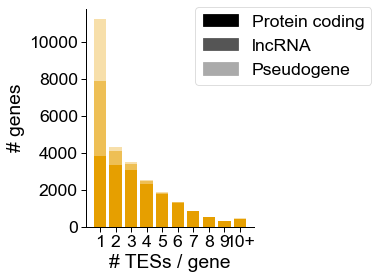

In [125]:
plot_n_feat_per_gene(h5,
                     'v40',
                     feat,
                     subset=ids, 
                     show_pc=True)

In [115]:
subset=ids
show_pc=True
max_ends = 10

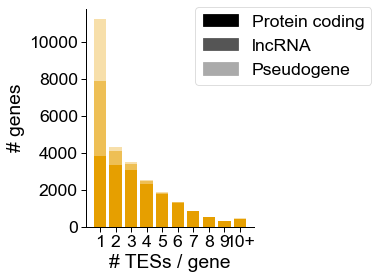

In [122]:
# get these features from cerberus
df = get_ca_table(h5, feat)

# get subset features
if subset:
    df = df.loc[df.Name.isin(subset)]

# 
if show_pc:
    gene_df, _, _ = get_gtf_info(how='gene', ver='v40_cerberus')
    gene_df['gid'] = cerberus.get_stable_gid(gene_df, col='gid')
    gene_df = gene_df[['gid', 'biotype_category']]
    df = df.merge(gene_df, how='left', left_on='gene_id', right_on='gid')

# count # feats / gene
gb_cols = ['gene_id']
if show_pc:
    gb_cols += ['biotype_category']
keep_cols = gb_cols + ['Name']
df = df[keep_cols]
df = df.groupby(gb_cols).count().reset_index()
df.rename({'Name': feat_col}, axis=1, inplace=True)

# create counts df
gb_cols = [feat_col]
if show_pc:
    gb_cols += ['biotype_category']
df = df.groupby(gb_cols).count().reset_index()

# group all the entries over the max number
df.rename({'gene_id': 'n_genes'}, axis=1, inplace=True)
df.loc[df[feat_col] >= max_ends, feat_col] = '{}+'.format(max_ends)
df = df.groupby(gb_cols).sum().reset_index()

sns.set_context('paper', font_scale=2)
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['pdf.fonttype'] = 42
plt.figure(figsize=(3,4))

c_dict, order = get_sector_colors()
if feat == 'ic':
    c = c_dict['splicing']
else:
    c = c_dict[feat]
if show_pc: 
    biotypes = ['protein_coding', 'lncRNA', 'pseudogene']
    b_dict = {'protein_coding': 'Protein coding',
              'lncRNA': 'lncRNA',
              'pseudogene': 'Pseudogene'}
    # biotypes.reverse()
    c_dict, order = get_shade_colors(c, biotypes)
    # order.reverse()

df = df.pivot(index=feat_col, columns=['biotype_category'])
df.columns = df.columns.droplevel(0)
df.reset_index(inplace=True)

df[feat_col] = df[feat_col].astype(str)
x = df[feat_col].unique().tolist()

# loop through biotypes
bottom = [0 for i in range(len(x))]
for b in order:
    y = df[b].tolist()
    plt.bar(x, y, color=c_dict[b], bottom=bottom)
    bottom = [b_coord+y_coord for b_coord, y_coord in zip(bottom, y)]

plt.xlabel('# {}s / gene'.format(feat.upper()))
plt.ylabel('# genes')
sns.despine()

leg_labels = [b_dict[o] for o in order]
plt.legend(leg_labels, bbox_to_anchor=(.6, 1.05))
ax = plt.gca()
leg = ax.get_legend()
shade_dict, _ = get_shade_colors('#000000', order)
for i, o in enumerate(order):
    leg.legendHandles[i].set_color(shade_dict[o])

fname = 'figures/{}_per_gene_support.png'.format(feat)
plt.savefig(fname, dpi=500, bbox_inches='tight')

fname = 'figures/{}_per_gene_support.pdf'.format(feat)
plt.savefig(fname, dpi=500, bbox_inches='tight')

In [16]:
df = plot_n_feat_per_gene(h5,
                     obs_source,
                     feat=feat,
                     show_pc=True,
                     subset=ids)

> <ipython-input-13-b698a7b40e32>(24)plot_n_feat_per_gene()
     22 
     23     # count # feats / gene
---> 24     df = df[['gene_id', 'Name']]
     25     df = df.groupby('gene_id').count().reset_index()
     26     df.rename({'Name': 'n_{}'.format(feat)}, axis=1, inplace=True)



ipdb>  df.head()


  Chromosome      Start        End Strand               Name  \
0       chr1  169854029  169854130      +  ENSG00000000460_1   
1       chr1  169804296  169804436      +  ENSG00000000460_2   
2       chr1  169852986  169853135      +  ENSG00000000460_3   
5       chr1  169853210  169853311      +  ENSG00000000460_6   
7       chr1  196747451  196747666      +  ENSG00000000971_1   

                              source novelty          gene_id  tes  
0           v40,v29,lapa,polya_atlas   Known  ENSG00000000460    1  
1      v40,v29,lapa,gtex,polya_atlas   Known  ENSG00000000460    2  
2  v40,v29,lapa,gtex,pas,polya_atlas   Known  ENSG00000000460    3  
5              lapa,gtex,polya_atlas   Novel  ENSG00000000460    6  
7      v40,v29,lapa,gtex,polya_atlas   Known  ENSG00000000971    1  


ipdb>  gene_df, _, _ = get_gtf_info(how='gene', ver='v40_cerberus')
ipdb>  gene_df.head()


                  gid     gname  length         biotype biotype_category  \
0  ENSG00000000460.17  C1orf112  192174  protein_coding   protein_coding   
1  ENSG00000000971.17       CFH  100823  protein_coding   protein_coding   
2  ENSG00000001461.17    NIPAL3   57275  protein_coding   protein_coding   
3  ENSG00000004487.18     KDM1A   64347  protein_coding   protein_coding   
4  ENSG00000007933.13      FMO3   27019  protein_coding   protein_coding   

      tf  
0  False  
1  False  
2  False  
3  False  
4  False  


ipdb>  gene_df['gid'] = cerberus.get_stable_gid(gene_df, col='gid')
ipdb>  gene_df.head()


               gid     gname  length         biotype biotype_category     tf
0  ENSG00000000460  C1orf112  192174  protein_coding   protein_coding  False
1  ENSG00000000971       CFH  100823  protein_coding   protein_coding  False
2  ENSG00000001461    NIPAL3   57275  protein_coding   protein_coding  False
3  ENSG00000004487     KDM1A   64347  protein_coding   protein_coding  False
4  ENSG00000007933      FMO3   27019  protein_coding   protein_coding  False


ipdb>  df.head()


  Chromosome      Start        End Strand               Name  \
0       chr1  169854029  169854130      +  ENSG00000000460_1   
1       chr1  169804296  169804436      +  ENSG00000000460_2   
2       chr1  169852986  169853135      +  ENSG00000000460_3   
5       chr1  169853210  169853311      +  ENSG00000000460_6   
7       chr1  196747451  196747666      +  ENSG00000000971_1   

                              source novelty          gene_id  tes  
0           v40,v29,lapa,polya_atlas   Known  ENSG00000000460    1  
1      v40,v29,lapa,gtex,polya_atlas   Known  ENSG00000000460    2  
2  v40,v29,lapa,gtex,pas,polya_atlas   Known  ENSG00000000460    3  
5              lapa,gtex,polya_atlas   Novel  ENSG00000000460    6  
7      v40,v29,lapa,gtex,polya_atlas   Known  ENSG00000000971    1  


ipdb>  gene_df = gene_df[['gid', 'biotype_category']]
ipdb>  df = df.merge(gene_df, how='left', left_on='gene_id', right_on='gid')
ipdb>  df.head()


  Chromosome      Start        End Strand               Name  \
0       chr1  169854029  169854130      +  ENSG00000000460_1   
1       chr1  169804296  169804436      +  ENSG00000000460_2   
2       chr1  169852986  169853135      +  ENSG00000000460_3   
3       chr1  169853210  169853311      +  ENSG00000000460_6   
4       chr1  196747451  196747666      +  ENSG00000000971_1   

                              source novelty          gene_id  tes  \
0           v40,v29,lapa,polya_atlas   Known  ENSG00000000460    1   
1      v40,v29,lapa,gtex,polya_atlas   Known  ENSG00000000460    2   
2  v40,v29,lapa,gtex,pas,polya_atlas   Known  ENSG00000000460    3   
3              lapa,gtex,polya_atlas   Novel  ENSG00000000460    6   
4      v40,v29,lapa,gtex,polya_atlas   Known  ENSG00000000971    1   

               gid biotype_category  
0  ENSG00000000460   protein_coding  
1  ENSG00000000460   protein_coding  
2  ENSG00000000460   protein_coding  
3  ENSG00000000460   protein_coding  
4  E

ipdb>  q


BdbQuit: 

## 220830 adding arrows to simplex

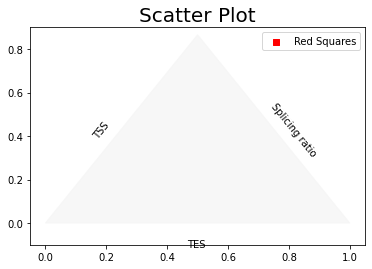

In [2]:
fig, tax = ternary.figure()
tax.set_title("Scatter Plot", fontsize=20)
points = [(1,1), (2,1)]
tax.scatter(points, marker='s', color='red', label="Red Squares")
tax.legend()
tax.left_axis_label('TSS')
tax.right_axis_label('Splicing ratio')
tax.bottom_axis_label('TES')

In [3]:
tax._labels['left']

('TSS', (-0.08, 0.6, 0.4), 60, {})

In [4]:
tax._labels

{'left': ('TSS', (-0.08, 0.6, 0.4), 60, {}),
 'right': ('Splicing ratio', (0.48000000000000004, 0.6, 0), -60, {}),
 'bottom': ('TES', (0.5, -0.01, 0.5), 0, {})}

In [5]:
def left_axis_arrow(tax, position=None,  rotation=60, offset=0.08,
                    **kwargs):
    """
    Sets the label on the left axis.

    Parameters
    ----------
    label: String
        The axis label
    position: 3-Tuple of floats, None
        The position of the text label
    rotation: float, 60
        The angle of rotation of the label
    offset: float,
        Used to compute the distance of the label from the axis
    kwargs:
        Any kwargs to pass through to matplotlib.
    """

    if not position:
        position = (-offset, 3./5, 2./5)
    tax._arrows["left"] = ('', position, rotation, kwargs)

def right_axis_arrow(tax, position=None, rotation=-60, offset=0.08,
                     **kwargs):

    """
    Sets the label on the right axis.

    Parameters
    ----------
    label: String
        The axis label
    position: 3-Tuple of floats, None
        The position of the text label
    rotation: float, -60
        The angle of rotation of the label
    offset: float,
        Used to compute the distance of the label from the axis
    kwargs:
        Any kwargs to pass through to matplotlib.
    """

    if not position:
        position = (2. / 5 + offset, 3. / 5, 0)
    tax._arrows["right"] = ('', position, rotation, kwargs)

def bottom_axis_arrow(tax, position=None, rotation=0, offset=0.02,
                      **kwargs):
    """
    Sets the label on the bottom axis.

    Parameters
    ----------
    label: String
        The axis label
    position: 3-Tuple of floats, None
        The position of the text label
    rotation: float, 0
        The angle of rotation of the label
    offset: float,
        Used to compute the distance of the label from the axis
    kwargs:
        Any kwargs to pass through to matplotlib.
    """

    if not position:
        position = (0.5, -offset / 2., 0.5)
    tax._arrows["bottom"] = ('', position, rotation, kwargs)

In [8]:
SQRT3 = np.sqrt(3)
SQRT3OVER2 = SQRT3 / 2.

def project_point(p, permutation=None):
    """
    Maps (x,y,z) coordinates to planar simplex.

    Parameters
    ----------
    p: 3-tuple
        The point to be projected p = (x, y, z)
    permutation: string, None, equivalent to "012"
        The order of the coordinates, counterclockwise from the origin
    """
    permuted = permute_point(p, permutation=permutation)
    a = permuted[0]
    b = permuted[1]
    x = a + b/2.
    y = SQRT3OVER2 * b
    return np.array([x, y])

def permute_point(p, permutation=None):
    """
    Permutes the point according to the permutation keyword argument. The
    default permutation is "012" which does not change the order of the
    coordinate. To rotate counterclockwise, use "120" and to rotate clockwise
    use "201"."""
    if not permutation:
        return p
    return [p[int(permutation[i])] for i in range(len(p))]


In [39]:
abs(-60)

60

In [78]:
def draw_arrows(tax):
    """Redraw axis labels, typically after draw or resize events."""
    # Redraw the labels with the appropriate angles
    ax = tax.get_axes()
    arrow_data = list(tax._arrows.values())
    for (label, position, rotation, kwargs) in arrow_data:
        transform = ax.transAxes
        print(rotation)
        x = position[0]
        y = position[1]
        dx = (1/3)*math.sin(abs(rotation))
        dy = (1/3)*math.sin(90-abs(rotation))
        x2 = x+dx
        y2 = y+dy
        z2 = sum(position)-(x2+y2)
        # print(position)
        # print((x2,y2,z2))
        # print()
        print('x, x2')
        print((x, x2))
        print('y, y2')
        print((y, y2))
        proj_x, proj_y = project_point(position)
        
        position = np.array([proj_x, proj_y])
        new_rotation = ax.transData.transform_angles(
                np.array((rotation,)), position.reshape((1, 2)))[0]
        
        proj_x2, proj_y2 = project_point((x2, y2, z2))
        proj_dx = proj_x2-proj_x
        proj_dy = proj_y2-proj_y
        print('x proj, x2 proj')
        print((proj_x, proj_x2))
        print('y proj, y2_proj')
        print((proj_y, proj_y2))
        print('new rotation')
        print(new_rotation)
        print()
        

        arrow = ax.arrow(proj_x, proj_y,
                         proj_dx, proj_dy, head_width=0.02,
                         width=.0005,
                          **kwargs)


60
x, x2
(-0.08, -0.18160354036740556)
y, y2
(0.6, 0.27065612530237937)
x proj, x2 proj
(0.21999999999999997, -0.046275477716215874)
y proj, y2_proj
(0.5196152422706631, 0.2343950802017247)
new rotation
51.05654304257676



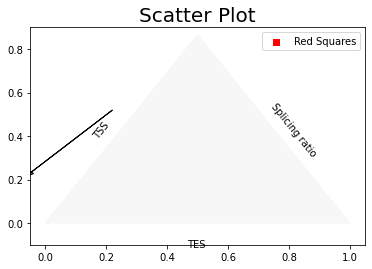

In [80]:
fig, tax = ternary.figure()
tax.set_title("Scatter Plot", fontsize=20)
points = [(1,2), (2,1)]
tax.scatter(points, marker='s', color='red', label="Red Squares")
tax.legend()
tax.left_axis_label('TSS')
tax.right_axis_label('Splicing ratio')
tax.bottom_axis_label('TES')
tax._arrows = {}
left_axis_arrow(tax)
# right_axis_arrow(tax)
# bottom_axis_arrow(tax)
draw_arrows(tax)

## 220816 genes where sr == tss == tes

In [12]:
ca = cerberus.read('cerberus_annot_triplets.h5')

In [13]:
df = ca.triplets

In [15]:
df = df.loc[df.source == 'obs_det']

In [18]:
print(len(df.index))
df = df.loc[(df.n_tss == df.splicing_ratio)&(df.n_tss == df.n_tes)]
print(len(df.index))

26781
8796


In [20]:
print(len(df.index))
df = df.loc[df.n_tss > 1]
print(len(df.index))


8796
163


In [21]:
df.head()

,source,gid,n_tss,n_tes,n_ic,n_iso,splicing_ratio,gname,sample,gene_tpm
14,obs_det,ENSG00000001617,2.0,2.0,4.0,7.0,2.0,SEMA3F,NaN,NaN
515,obs_det,ENSG00000035720,2.0,2.0,4.0,7.0,2.0,STAP1,NaN,NaN
559,obs_det,ENSG00000040487,3.0,3.0,9.0,11.0,3.0,SLC66A1,NaN,NaN
577,obs_det,ENSG00000042429,4.0,4.0,16.0,23.0,4.0,MED17,NaN,NaN
644,obs_det,ENSG00000049245,2.0,2.0,4.0,5.0,2.0,VAMP3,NaN,NaN


In [23]:
df.sort_values(by='n_tss', ascending=False).head()

,source,gid,n_tss,n_tes,n_ic,n_iso,splicing_ratio,gname,sample,gene_tpm
13976,obs_det,ENSG00000182220,5.0,5.0,25.0,31.0,5.0,ATP6AP2,NaN,NaN
7137,obs_det,ENSG00000137312,5.0,5.0,25.0,42.0,5.0,FLOT1,NaN,NaN
10461,obs_det,ENSG00000163479,4.0,4.0,16.0,19.0,4.0,SSR2,NaN,NaN
577,obs_det,ENSG00000042429,4.0,4.0,16.0,23.0,4.0,MED17,NaN,NaN
11498,obs_det,ENSG00000167645,4.0,4.0,16.0,20.0,4.0,YIF1B,NaN,NaN


In [22]:
df.to_csv('obs_det_triplets_111.tsv', sep='\t', index=False)

## What novelty is that one mef2c transcript

In [3]:
ca = cerberus.read('cerberus_annot.h5')

In [5]:
ca.tss.head()

,Chromosome,Start,End,Strand,Name,source,novelty,gene_id,tss
0,chr1,169794989,169795129,+,ENSG00000000460_1,"v40,v29,lapa,gtex,encode_cage,fantom_cage,enco...",Known,ENSG00000000460,1
1,chr1,169795358,169795459,+,ENSG00000000460_2,"v40,v29,lapa,pls",Known,ENSG00000000460,2
2,chr1,169794679,169794780,+,ENSG00000000460_3,"v40,v29,lapa,gtex,pls",Known,ENSG00000000460,3
3,chr1,169795870,169795971,+,ENSG00000000460_4,"v40,v29,pls",Known,ENSG00000000460,4
4,chr1,169661956,169662057,+,ENSG00000000460_5,"v40,v29,dels",Known,ENSG00000000460,5


In [7]:
ca.tss.loc[(ca.tss.gene_id=='ENSG00000081189')&(ca.tss.tss==1)].novelty

44405    Known
Name: novelty, dtype: object

In [8]:
ca.tes.loc[(ca.tes.gene_id=='ENSG00000081189')&(ca.tes.tes==20)].novelty

70064    Known
Name: novelty, dtype: object

In [10]:
ca.ic.loc[(ca.ic.gene_id=='ENSG00000081189')&(ca.ic.ic==43)]

,Chromosome,Strand,Coordinates,Name,source,novelty,gene_id,ic
192589,chr5,-,88882954-88823927-88823734-88804801,ENSG00000081189_43,"v40,v29,lapa",Known,ENSG00000081189,43


## PolyA gene detection at 0, 1, and 100 TPM

In [3]:
ab = '../talon/human_talon_abundance.tsv'
ver = 'v40_cerberus'

In [18]:
df = pd.read_csv(ab, sep='\t')
df, inds = get_tpm_table(df,
                   how='gene',
                   gene_subset='polya',
                   min_tpm=0)

gene_df, b_counts, b_cat_counts = get_gtf_info(how='gene', ver=ver)

polya_biotypes = ['protein_coding', 'pseudogene', 'lncRNA']
polya_genes = gene_df.loc[gene_df.biotype_category.isin(polya_biotypes), 'gid'].tolist()
n_polya = len(polya_genes)
n_det_polya = len(df.index)

print('Detected {} / {} ({:.3}%) annotated polyA genes'.format(n_det_polya, n_polya, (n_det_polya/n_polya)*100))

tpm_df = df.copy(deep=True)
tpm_dfs = []
tpm_dfs.append(tpm_df)
tpm_dfs.append(tpm_df.loc[(tpm_df >= 1).any(axis=1)])
tpm_dfs.append(tpm_df.loc[(tpm_df >= 100).any(axis=1)])

det_df = pd.DataFrame()
for df, tpm in zip(tpm_dfs, [0,1,100]):
    gene_df, _, _ = get_gtf_info(how='gene', subset='polya', ver=ver, add_stable_gid=True)
    gene_df = gene_df[['gid_stable', 'gname', 'biotype_category']]

    df.reset_index(inplace=True)
    df = df.merge(gene_df, how='left', on='gid_stable')

    df = df[['gid_stable', 'biotype_category']].groupby('biotype_category').count()
    df.rename({'gid_stable':'obs_counts'}, axis=1, inplace=True)

    gene_df = gene_df[['gid_stable', 'biotype_category']].groupby('biotype_category').count()
    gene_df.rename({'gid_stable':'annot_counts'}, axis=1, inplace=True)
    df = df.merge(gene_df, how='left', left_index=True, right_index=True)

    df['perc'] = (df.obs_counts/df.annot_counts)*100
    df = df.sort_values(by='perc', ascending=False)
    df['tpm_thresh'] = tpm
    det_df = pd.concat([det_df, df])
    
det_df = det_df.reset_index()
det_df.head()

In [87]:
det_df

,biotype_category,obs_counts,annot_counts,perc,tpm_thresh
0,protein_coding,19246,19988,96.287773,0
1,lncRNA,12715,17748,71.641875,0
2,pseudogene,7720,14538,53.102215,0
3,protein_coding,18727,19988,93.691215,1
4,lncRNA,10713,17748,60.361731,1
5,pseudogene,4332,14538,29.797771,1
6,protein_coding,9776,19988,48.909346,100
7,lncRNA,254,17748,1.431147,100
8,pseudogene,101,14538,0.694731,100


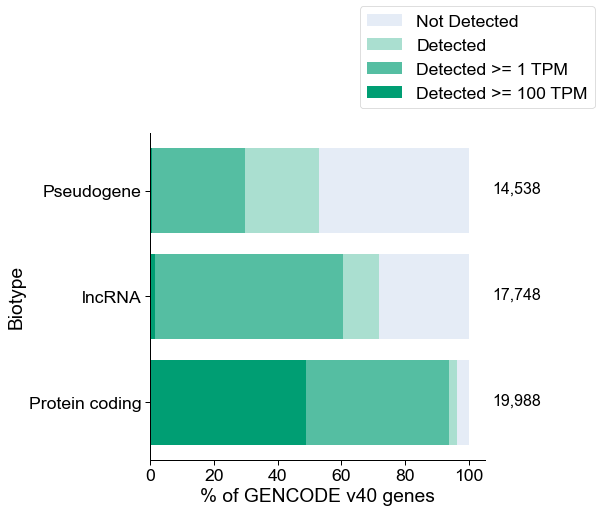

In [86]:
sns.set_context('paper', font_scale=2)
plt.figure(figsize=(6,6))
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['pdf.fonttype'] = 42
ic_colors, order = get_ic_nov_colors()
gray = get_sector_colors()[0]['simple']
c = ic_colors['Known']
cats = [100,1,0]
c_dict, order = get_shade_colors(c, cats)
order.reverse()
biotypes = ['protein_coding', 'lncRNA', 'pseudogene']
b_dict = {'protein_coding': 'Protein coding',
          'lncRNA': 'lncRNA',
          'pseudogene': 'Pseudogene'}

# https://matplotlib.org/2.0.2/examples/api/barchart_demo.html
def add_n(rects, label):
    ax = plt.gca()
    for rect in rects:
        # height = rect.get_height()
        x = rect.get_y()+rect.get_height()/2.3
        y = rect.get_width()*1.15
        ax.text(y,x,
                '{:,}'.format(label),
                ha='center', va='bottom', size=16)

for b in biotypes:
    x = b_dict[b]
    y = 0
    rects = plt.barh(x, [100], color=gray)
    # add total number of genes
    n = det_df.loc[(det_df.biotype_category == b)&(det_df.tpm_thresh==0), 'annot_counts'].tolist()[0]
    add_n(rects, n)
    
    for c in order:
        curr_y = det_df.loc[(det_df.biotype_category == b)&(det_df.tpm_thresh==c), 'perc'].tolist()[0]
        plt.barh(x, [curr_y], color=c_dict[c])
        y = y+curr_y
    


leg_labels = ['Not Detected', 'Detected', 'Detected >= 1 TPM', 'Detected >= 100 TPM']
plt.legend(leg_labels, bbox_to_anchor=(.6, 1.05))
ax = plt.gca()
leg = ax.get_legend()

# plt.yticks(rotation=90)

plt.ylabel('Biotype')
plt.xlabel('% of GENCODE v40 genes')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

fname = 'figures/gene_det_by_biotype.png'
plt.savefig(fname, dpi=500, bbox_inches='tight')
fname = 'figures/gene_det_by_biotype.pdf'
plt.savefig(fname, dpi=500, bbox_inches='tight')